# Business Case Study: OLA - Ensemble Learning

# 1.0 Defining the Problem Statement

## 1.1 About the OLA Organisation:
Ola is one of the leading ride-hailing platforms in India, offering services that cater to millions of customers daily. However, recruiting and retaining drivers remains a persistent challenge for the company. High driver attrition rates impact organizational morale and incur significant costs, as acquiring new drivers is more expensive than retaining existing ones.

## 1.2 Problem Statement

**Objective:**
- Predict whether a driver will leave the company based on their attributes.
- Identify key factors contributing to driver attrition.
- Provide actionable recommendations to reduce driver churn and optimize recruitment efforts.

**Scope:**
- This case study focuses on the attrition of drivers within the Ola ecosystem.
- The model will use historical driver data, including demographics, tenure information, and performance metrics, to make predictions.
- The analysis will address challenges such as imbalanced datasets, missing values, and the need for robust predictive models.

**Key Deliverables:**
- A predictive model leveraging ensemble learning techniques such as Bagging and Boosting to classify drivers as likely to stay or leave.
- Strategies for handling imbalanced datasets and imputing missing values using KNN.
- Business recommendations to improve driver retention and reduce recruitment costs.

# 2.0 Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('ola_driver.csv')
df.head(5)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


**Key Observations**
- We don't have primary key but we can use Driver_ID as the indentifier because the dataset is a record of each driver and their respective features like income, joning date, city they are based on, educational qualification and so on.


# 3.0 Exploratory Data Analysis  

In [ ]:
df.shape
print(f'Total number of rows : {df.shape[0]}')
print(f'Total number of columns : {df.shape[1]}')


Total number of rows : 19104
Total number of columns : 14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


**Key Observations**
- Totally we have 19104 rows and 14 columns.
- The dataset needs Null handling and datatype correction.



In [ ]:
df.duplicated().sum()

0

In [ ]:
a = df.isnull().sum()/len(df)*100
a = a[a > 0]
a

,0
Age,0.319305
Gender,0.272194
LastWorkingDate,91.541039


In [ ]:
df['Driver_ID'].value_counts(dropna = False)

,count
Driver_ID,
2110,24
2617,24
1623,24
1642,24
1644,24
...,...
1614,1
445,1
2397,1


# Key Observations
- There are no duplicate values.
- Also we have null values in Age and gender.
- Though we have null values in the last working date column we don't consider them as null values as they signify if the driver is churned or not.
- We hold multiple records of each individual
we will consider the driver ID 2110 since it has lots of records, we can get a better understanding of the dataset


**Getting sense of the dataset**

In [ ]:
df[df['Driver_ID'] == 2110]

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
14143,14143,01/01/19,2110,36.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14144,14144,02/01/19,2110,36.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14145,14145,03/01/19,2110,37.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14146,14146,04/01/19,2110,37.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14147,14147,05/01/19,2110,37.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14148,14148,06/01/19,2110,37.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14149,14149,07/01/19,2110,37.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14150,14150,08/01/19,2110,37.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14151,14151,09/01/19,2110,37.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14152,14152,10/01/19,2110,37.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1


# Key Observstions
- Total number of records reflected here gives us the number of times the driver reported and brought business to the organization.
- We can also find the duration they are/were with the organisation with joining date and the recent reporting date and check thier correlation.
- Creating a column that flags whether a driver's Quarterly Rating has dropped at any point can be highly significant for your analysis, as it directly reflects performance consistency, which could influence attrition.
- Income is also a very significant motivator that can influence churn.


**Next Steps**
- The records needs to be aggragated to make sense of the data and change their column names respectively.
- This aid a lot when we are training the model.

# 4.0 Data Preprocessing

**Restructuring the Original Dataset using aggregation**

In [ ]:
df_aggregated = df.groupby(['Driver_ID']).aggregate({
    'MMM-YY': 'count', 'Age': 'max', 'City': 'last', 'Education_Level': 'max',
    'Income' : 'mean','Dateofjoining': 'first', 'Joining Designation': 'first',
    'Grade': 'mean', 'Total Business Value': 'sum', 'Quarterly Rating': 'mean'
})
df_aggregated.reset_index(inplace = True)
df_aggregated.head(3)

,Driver_ID,MMM-YY,Age,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.0
1,2,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.0
2,4,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.0


**Renaming the Aggregated Columns**

In [ ]:
df_aggregated.rename(columns = {
    'MMM-YY': 'Total_records', 'Dateofjoining': 'Date_of_joining',
    'Joining Designation': 'Joining_Designation',
    'Total Business Value': 'Total_Business_Value',
    'Quarterly Rating': 'Quarterly_Rating'
}, inplace = True)
df_aggregated.tail(3)

,Driver_ID,Total_records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
2378,2786,9,45.0,C19,0,35370.0,31/07/18,2,2.0,2815090,1.666667
2379,2787,6,28.0,C20,2,69498.0,21/07/18,1,1.0,977830,1.500000
2380,2788,7,30.0,C27,2,70254.0,06/08/20,2,2.0,2298240,2.285714


**Combining Data to Create the Final Dataset**

In [ ]:
final_df = pd.merge(left = df.groupby(df['Driver_ID'])['LastWorkingDate'].last().reset_index(),
right = df_aggregated, on = 'Driver_ID', how = 'left')
final_df['LastWorkingDate'] = final_df['LastWorkingDate'].replace({None: np.nan})

final_df = pd.merge(left = df.groupby(df['Driver_ID'])['Gender'].last().reset_index(),
right = final_df, on = 'Driver_ID', how = 'left')
final_df.head(3)

,Driver_ID,Gender,LastWorkingDate,Total_records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
0,1,0.0,03/11/19,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.0
1,2,0.0,NaN,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.0
2,4,0.0,27/04/20,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.0


**Creating Target Variable by Mapping LastWorkingDate columns to 1's and 0's**

In [ ]:
final_df['churn'] = final_df['LastWorkingDate'].apply(lambda x: 0 if pd.isnull(x) else 1)
final_df.head(5)

,Driver_ID,Gender,LastWorkingDate,Total_records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,churn
0,1,0.0,03/11/19,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.0,1
1,2,0.0,NaN,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.0,0
2,4,0.0,27/04/20,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.0,1
3,5,0.0,03/07/19,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.0,1
4,6,1.0,NaN,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.6,0


In [ ]:
# Gives the churn percentage
churn_rate = (df.groupby(['Driver_ID'])['LastWorkingDate'].count().value_counts(normalize = True)*100).rename('Churn_rate')
churn_rate

,Churn_rate
LastWorkingDate,
1,67.870643
0,32.129357


In [ ]:
df.groupby("Driver_ID")["Quarterly Rating"].unique()

,Quarterly Rating
Driver_ID,
1,[2]
2,[1]
4,[1]
5,[1]
6,"[1, 2]"
...,...
2784,"[3, 1, 4]"
2785,[1]
2786,"[2, 1]"


**Creating Driver Performance Evaluation Column**

In [ ]:
def quat_tat_change(y):
  if y[-1] == max(y):
    return 0
  else:
    return 1
Quaterly_rating_decreased = df.groupby("Driver_ID")["Quarterly Rating"].unique().apply(quat_tat_change).reset_index().rename(columns = {'Quarterly Rating': 'Quaterly_rating_decreased'})
Quaterly_rating_decreased

,Driver_ID,Quaterly_rating_decreased
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
2376,2784,0
2377,2785,0
2378,2786,1
2379,2787,1


In [ ]:
final_df = pd.merge(left = Quaterly_rating_decreased,
right = final_df, on = 'Driver_ID', how = 'left')
final_df.tail(5)

,Driver_ID,Quaterly_rating_decreased,Gender,LastWorkingDate,Total_records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,churn
2376,2784,0,0.0,NaN,24,34.0,C24,0,82815.0,15/10/15,2,3.0,21748820,2.625000,0
2377,2785,0,1.0,28/10/20,3,34.0,C9,0,12105.0,28/08/20,1,1.0,0,1.000000,1
2378,2786,1,0.0,22/09/19,9,45.0,C19,0,35370.0,31/07/18,2,2.0,2815090,1.666667,1
2379,2787,1,1.0,20/06/19,6,28.0,C20,2,69498.0,21/07/18,1,1.0,977830,1.500000,1
2380,2788,1,0.0,NaN,7,30.0,C27,2,70254.0,06/08/20,2,2.0,2298240,2.285714,0


In [ ]:
final_df["Date_of_joining"] = pd.to_datetime(final_df["Date_of_joining"])
final_df["LastWorkingDate"] = pd.to_datetime(final_df["LastWorkingDate"])
# final_df["Duration"] = (final_df["LastWorkingDate"] - final_df["Date_of_joining"]).dt.days
# final_df.head(5)
final_df["joining_Year"] = final_df["Date_of_joining"].dt.year


In [ ]:
df[df['Driver_ID'] == 2788]

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
19097,19097,06/01/20,2788,29.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,1
19098,19098,07/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,497690,3
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2
19103,19103,12/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,411480,2


In [ ]:
def income_inc(y):

    if len(y)>=2:
        for i in range(len(y)):
            if y[-1]>y[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [ ]:
final_df = pd.merge(left = df.groupby("Driver_ID")["Income"].unique().apply(income_inc).rename("Increased_Income"),
        right = final_df,
         on = "Driver_ID",
         how="left"
    )

In [ ]:
final_df['Gender'] = final_df['Gender'].astype(int)
final_df['Grade'] = final_df['Grade'].astype(int)


In [ ]:
final_df["LastWorkingDate"] = final_df["LastWorkingDate"].fillna(pd.to_datetime("2021-06-01"))
final_df["Driver_tenure"] = (final_df["LastWorkingDate"] - final_df["Date_of_joining"]).dt.days

In [ ]:
final_df

,Driver_ID,Increased_Income,Quaterly_rating_decreased,Gender,LastWorkingDate,Total_records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,churn,joining_Year,Driver_tenure
0,1,0,0,0,2019-03-11,3,28.0,C23,2,57387.0,2018-12-24,1,1,1715580,2.000000,1,2018,77
1,2,0,0,0,2021-06-01,2,31.0,C7,2,67016.0,2020-11-06,2,2,0,1.000000,0,2020,207
2,4,0,0,0,2020-04-27,5,43.0,C13,2,65603.0,2019-12-07,2,2,350000,1.000000,1,2019,142
3,5,0,0,0,2019-03-07,3,29.0,C9,0,46368.0,2019-01-09,1,1,120360,1.000000,1,2019,57
4,6,0,0,1,2021-06-01,5,31.0,C11,1,78728.0,2020-07-31,3,3,1265000,1.600000,0,2020,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,0,0,2021-06-01,24,34.0,C24,0,82815.0,2015-10-15,2,3,21748820,2.625000,0,2015,2056
2377,2785,0,0,1,2020-10-28,3,34.0,C9,0,12105.0,2020-08-28,1,1,0,1.000000,1,2020,61
2378,2786,0,1,0,2019-09-22,9,45.0,C19,0,35370.0,2018-07-31,2,2,2815090,1.666667,1,2018,418
2379,2787,0,1,1,2019-06-20,6,28.0,C20,2,69498.0,2018-07-21,1,1,977830,1.500000,1,2018,334


**Check for Null values**

In [ ]:
final_df.isnull().sum()

,0
Driver_ID,0
Increased_Income,0
Quaterly_rating_decreased,0
Gender,0
LastWorkingDate,0
Total_records,0
Age,0
City,0
Education_Level,0
Income,0


In [ ]:
final_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Driver_ID,2381.0,1397.559009,1.0,695.0,1400.0,2100.0,2788.0,806.161628
Increased_Income,2381.0,0.01848,0.0,0.0,0.0,0.0,1.0,0.134706
Quaterly_rating_decreased,2381.0,0.247795,0.0,0.0,0.0,0.0,1.0,0.431823
Gender,2381.0,0.410332,0.0,0.0,0.0,1.0,1.0,0.491997
LastWorkingDate,2381,2020-06-08 05:40:29.735405312,2018-12-31 00:00:00,2019-09-22 00:00:00,2020-06-27 00:00:00,2021-06-01 00:00:00,2021-06-01 00:00:00,NaN
Total_records,2381.0,8.02352,1.0,3.0,5.0,10.0,24.0,6.78359
Age,2381.0,33.663167,21.0,29.0,33.0,37.0,58.0,5.983375
Education_Level,2381.0,1.00756,0.0,0.0,1.0,2.0,2.0,0.81629
Income,2381.0,59232.460484,10747.0,39104.0,55285.0,75835.0,188418.0,28298.214012
Date_of_joining,2381,2019-02-08 07:14:50.550189056,2013-04-01 00:00:00,2018-06-29 00:00:00,2019-07-21 00:00:00,2020-05-02 00:00:00,2020-12-28 00:00:00,NaN


In [ ]:
final_df.describe(include = 'object').T

,count,unique,top,freq
City,2381,29,C20,152


In [ ]:
graph_df = final_df.copy()
graph_df


,Driver_ID,Increased_Income,Quaterly_rating_decreased,Gender,LastWorkingDate,Total_records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,churn,joining_Year,Driver_tenure
0,1,0,0,0,2019-03-11,3,28.0,C23,2,57387.0,2018-12-24,1,1,1715580,2.000000,1,2018,77
1,2,0,0,0,2021-06-01,2,31.0,C7,2,67016.0,2020-11-06,2,2,0,1.000000,0,2020,207
2,4,0,0,0,2020-04-27,5,43.0,C13,2,65603.0,2019-12-07,2,2,350000,1.000000,1,2019,142
3,5,0,0,0,2019-03-07,3,29.0,C9,0,46368.0,2019-01-09,1,1,120360,1.000000,1,2019,57
4,6,0,0,1,2021-06-01,5,31.0,C11,1,78728.0,2020-07-31,3,3,1265000,1.600000,0,2020,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,0,0,2021-06-01,24,34.0,C24,0,82815.0,2015-10-15,2,3,21748820,2.625000,0,2015,2056
2377,2785,0,0,1,2020-10-28,3,34.0,C9,0,12105.0,2020-08-28,1,1,0,1.000000,1,2020,61
2378,2786,0,1,0,2019-09-22,9,45.0,C19,0,35370.0,2018-07-31,2,2,2815090,1.666667,1,2018,418
2379,2787,0,1,1,2019-06-20,6,28.0,C20,2,69498.0,2018-07-21,1,1,977830,1.500000,1,2018,334


In [ ]:
# graph_df['Quarterly_Rating'] = graph_df['Quarterly_Rating'].round(1)
final_df.drop(['LastWorkingDate', 'Date_of_joining',
               'Driver_tenure', 'Driver_ID'], inplace = True, axis = 1)

In [ ]:
final_df

,Increased_Income,Quaterly_rating_decreased,Gender,Total_records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,churn,joining_Year
0,0,0,0,3,28.0,C23,2,57387.0,1,1,1715580,2.000000,1,2018
1,0,0,0,2,31.0,C7,2,67016.0,2,2,0,1.000000,0,2020
2,0,0,0,5,43.0,C13,2,65603.0,2,2,350000,1.000000,1,2019
3,0,0,0,3,29.0,C9,0,46368.0,1,1,120360,1.000000,1,2019
4,0,0,1,5,31.0,C11,1,78728.0,3,3,1265000,1.600000,0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0,0,24,34.0,C24,0,82815.0,2,3,21748820,2.625000,0,2015
2377,0,0,1,3,34.0,C9,0,12105.0,1,1,0,1.000000,1,2020
2378,0,1,0,9,45.0,C19,0,35370.0,2,2,2815090,1.666667,1,2018
2379,0,1,1,6,28.0,C20,2,69498.0,1,1,977830,1.500000,1,2018


# 5.0 Graphical Analysis

In [ ]:
graph_df.sample(2)

,Driver_ID,Increased_Income,Quaterly_rating_decreased,Gender,LastWorkingDate,Total_records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,churn,joining_Year,Driver_tenure
523,606,0,0,1,2020-11-30,11,34.0,C10,0,114230.0,2020-01-31,3,3,2959740,1.545455,1,2020,304
1187,1397,0,0,1,2020-05-12,11,37.0,C11,1,106794.0,2019-07-04,3,3,1399000,1.000000,1,2019,313


## 5.1 Analysis of Numerical Columns

In [ ]:
numerical = ['Total_records', 'Age', 'Income', 'Total_Business_Value', 'Driver_tenure', 'joining_Year', 'Quarterly_Rating']

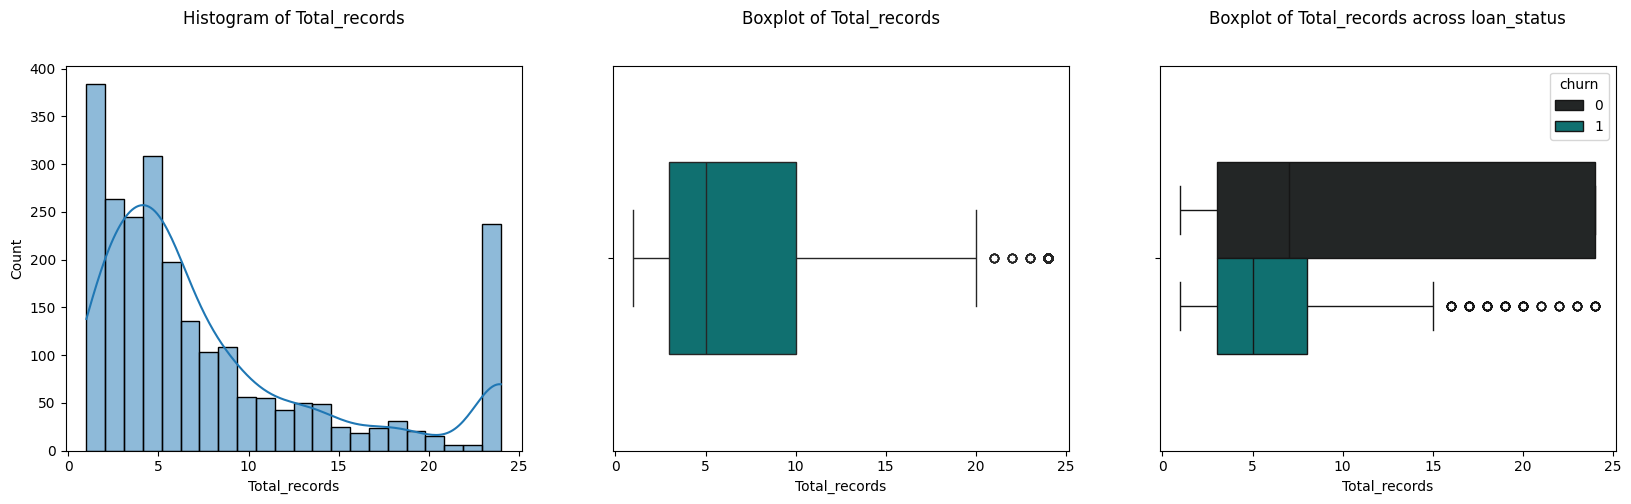

,Stat,Value
0,count,2381.00000
1,mean,8.02352
2,std,6.78359
3,min,1.00000
4,25%,3.00000
5,50%,5.00000
6,75%,10.00000
7,max,24.00000


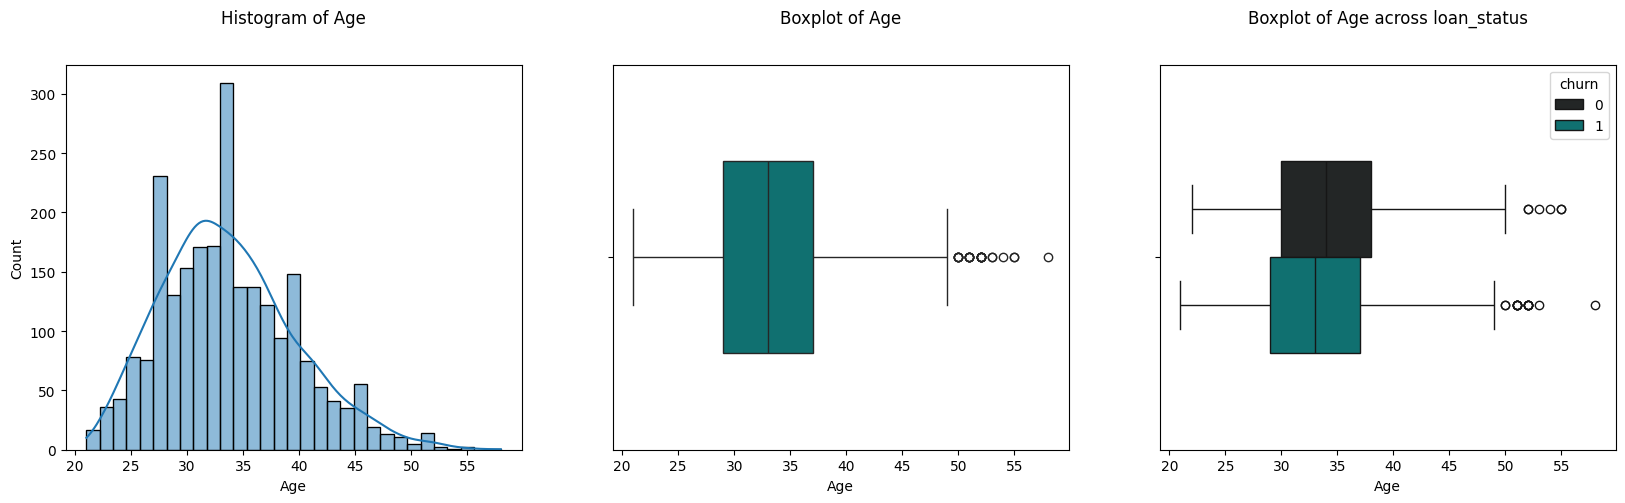

,Stat,Value
0,count,2381.000000
1,mean,33.663167
2,std,5.983375
3,min,21.000000
4,25%,29.000000
5,50%,33.000000
6,75%,37.000000
7,max,58.000000


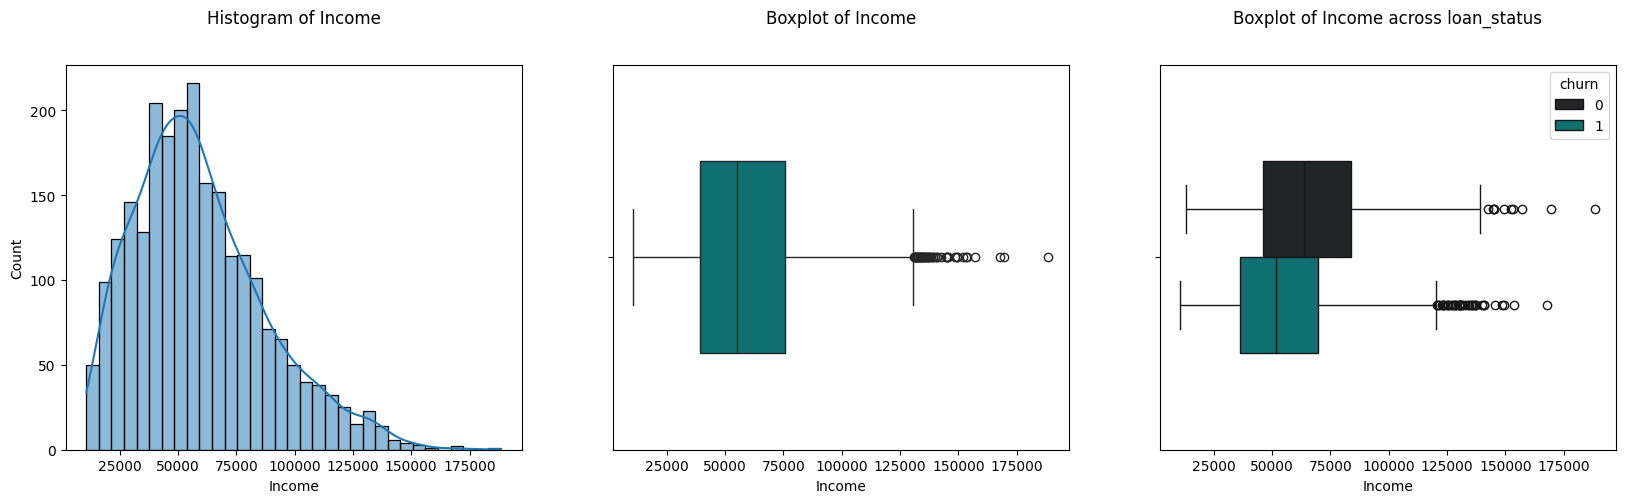

,Stat,Value
0,count,2381.000000
1,mean,59232.460484
2,std,28298.214012
3,min,10747.000000
4,25%,39104.000000
5,50%,55285.000000
6,75%,75835.000000
7,max,188418.000000


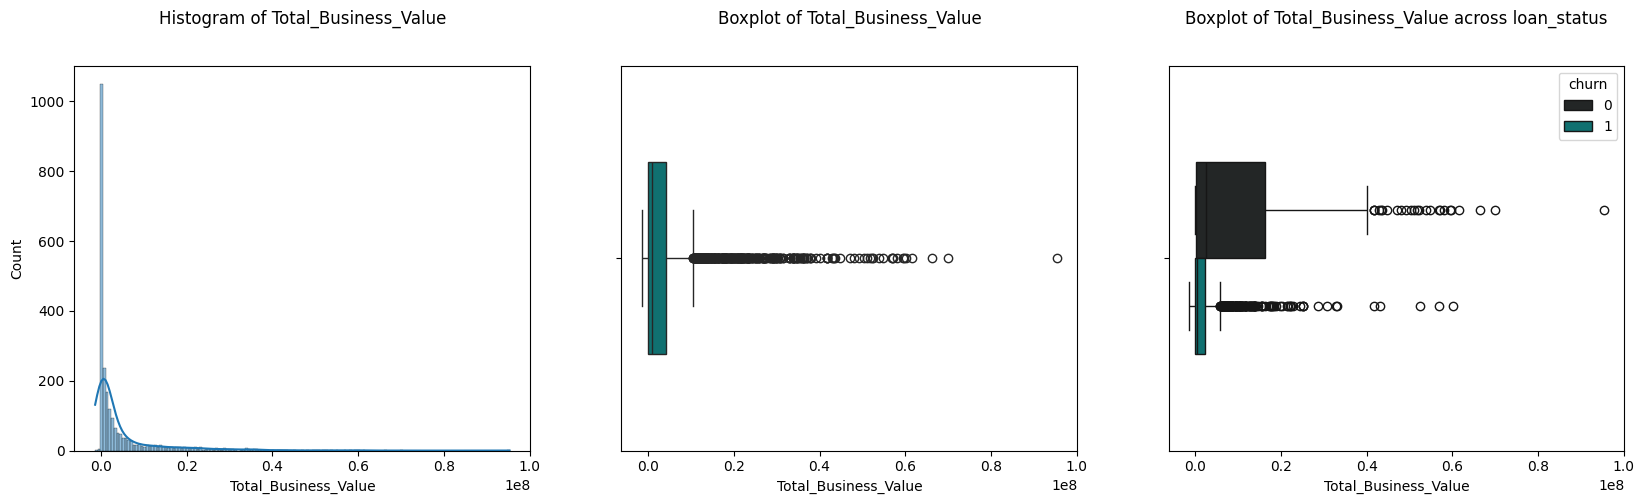

,Stat,Value
0,count,2.381000e+03
1,mean,4.586742e+06
2,std,9.127115e+06
3,min,-1.385530e+06
4,25%,0.000000e+00
5,50%,8.176800e+05
6,75%,4.173650e+06
7,max,9.533106e+07


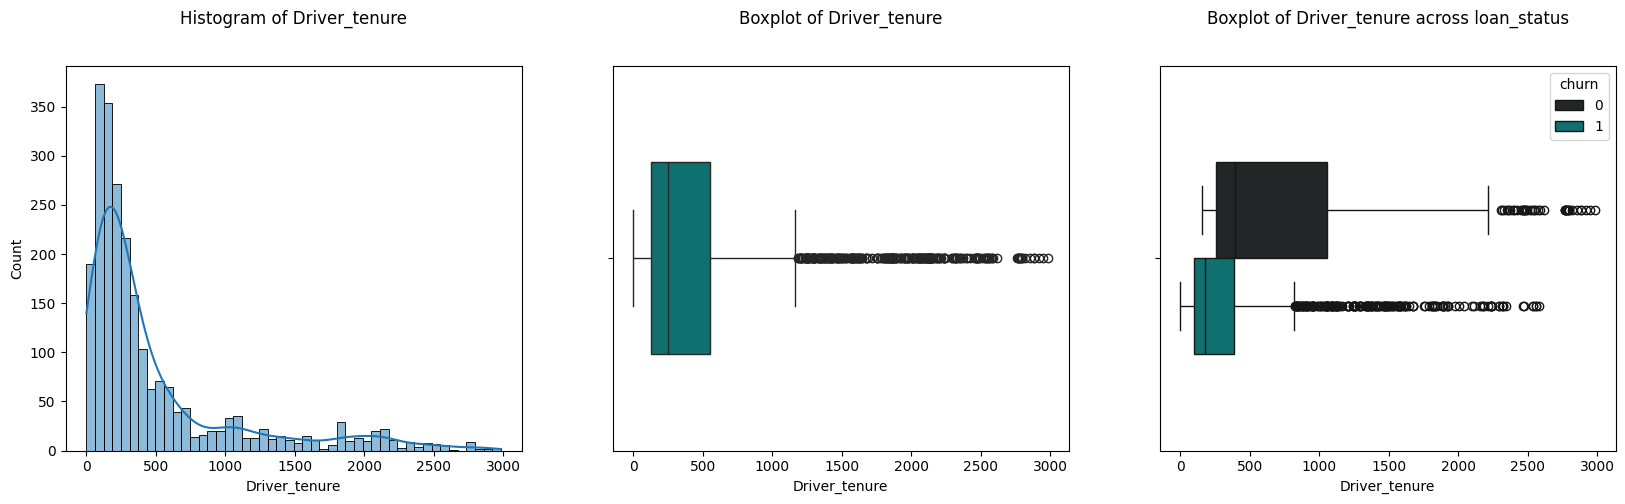

,Stat,Value
0,count,2381.000000
1,mean,485.934481
2,std,586.243860
3,min,0.000000
4,25%,129.000000
5,50%,249.000000
6,75%,549.000000
7,max,2983.000000


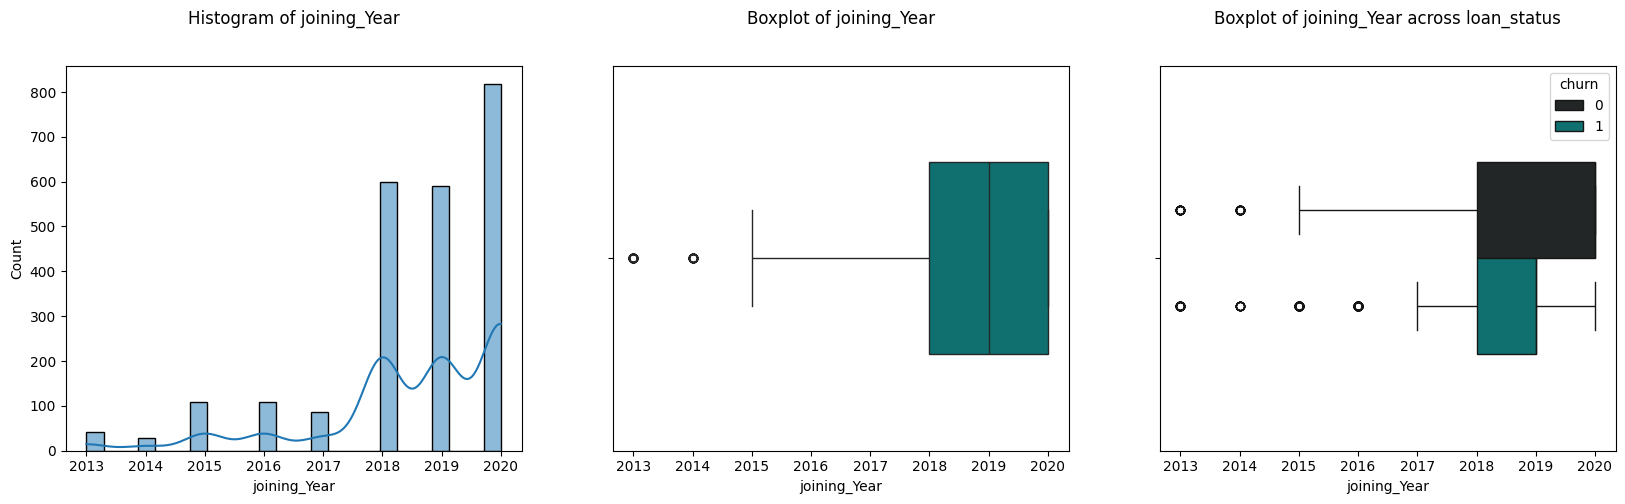

,Stat,Value
0,count,2381.000000
1,mean,2018.536329
2,std,1.609597
3,min,2013.000000
4,25%,2018.000000
5,50%,2019.000000
6,75%,2020.000000
7,max,2020.000000


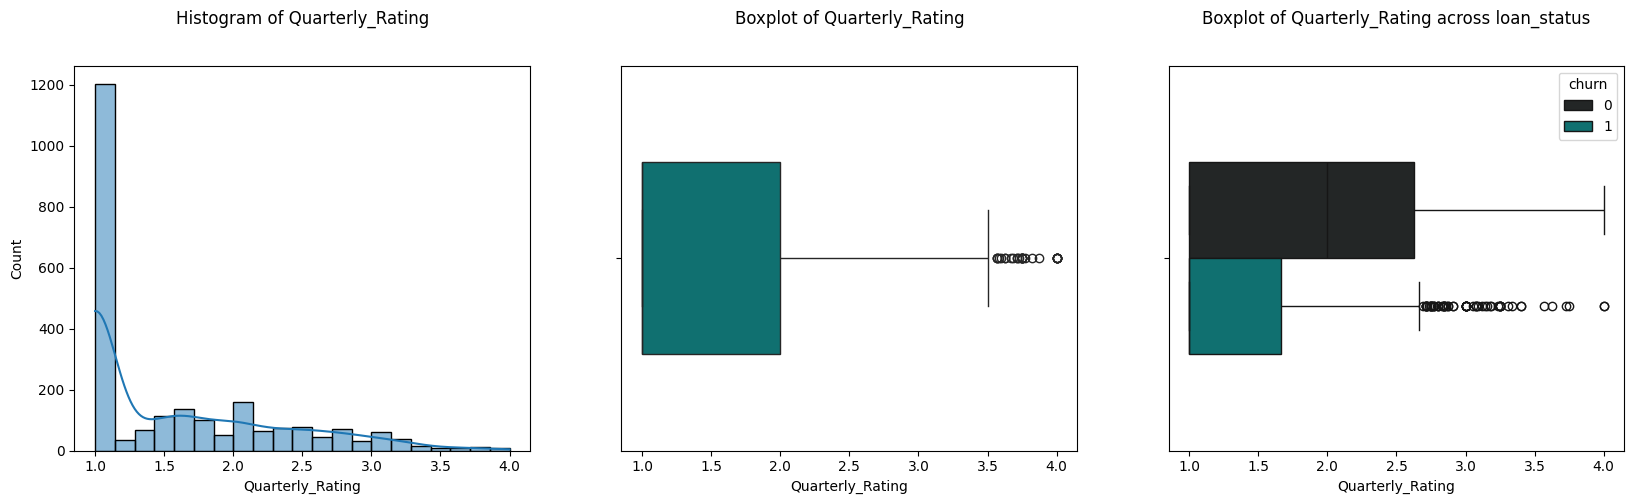

,Stat,Value
0,count,2381.000000
1,mean,1.566304
2,std,0.719652
3,min,1.000000
4,25%,1.000000
5,50%,1.000000
6,75%,2.000000
7,max,4.000000


In [ ]:
for i in numerical:
  fig, axes = plt.subplots(1,3, figsize = (20,5))
  sns.histplot(data = graph_df, x= graph_df[i], kde = True, ax = axes[0])
  axes[0].set_title(f"Histogram of {i}", pad = 30)
  # for j in axes[0].patches:
  #   values = j.get_height()
  #   percentage = 100 * values / len(graph_df)
  #   axes[0].annotate(f'{values}\n({percentage:.1f}%)', (j.get_x() +
  #   j.get_width()/2, j.get_height()+3), ha='center', va='bottom', fontsize=10)
  sns.boxplot(data = graph_df, x = graph_df[i], ax = axes[1], width = 0.5, color='teal')
  axes[1].set_title(f'Boxplot of {i}', pad = 30)
  sns.boxplot(data = graph_df, x = graph_df[i], ax = axes[2], width = 0.5,  color='teal', hue = 'churn')
  axes[2].set_title(f'Boxplot of {i} across loan_status', pad = 30)
  plt.show()
  tab_col = pd.DataFrame(graph_df[i].describe()).reset_index()
  tab_col.columns = ['Stat', 'Value']
  display(tab_col)

## 5.2 Decision on Outliers
- Though we have multiple outliers in the dataset, realistically they all make sense as a real life dataset.
- Since there are not enough values in our dataset, there isn't much spread to accomodate minor deflection making it look like outliers.
- So we will have them in our dataset to have the model learn the pattern, so it can make better predictions.

## 5.3 Analysis of Categorical Columns

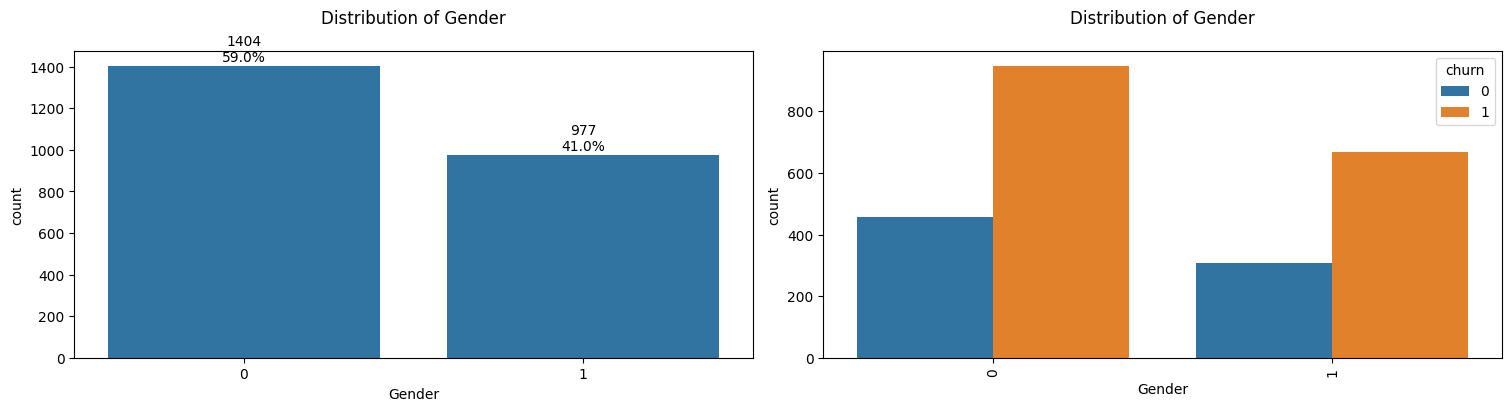

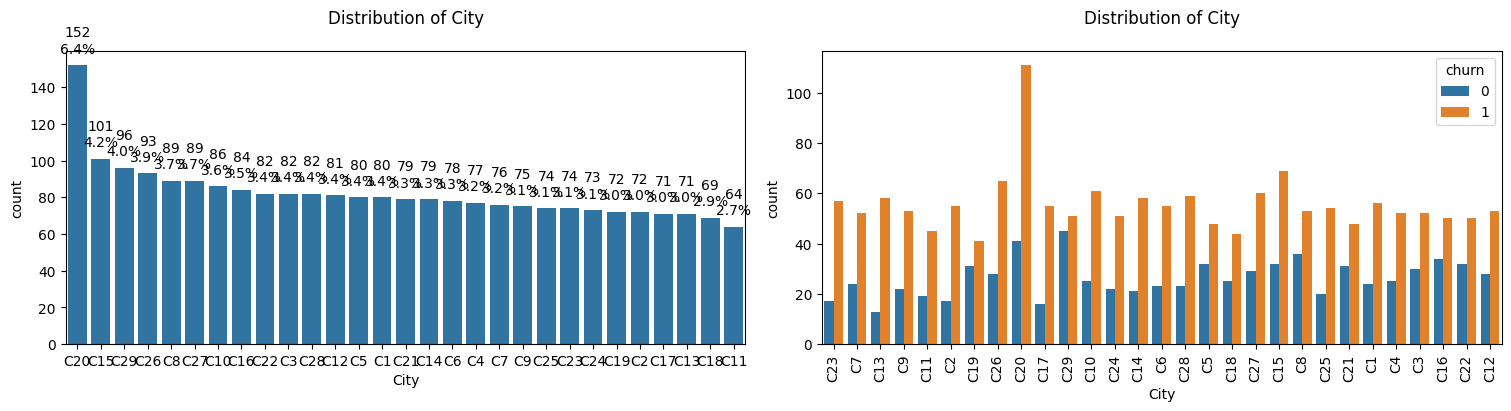

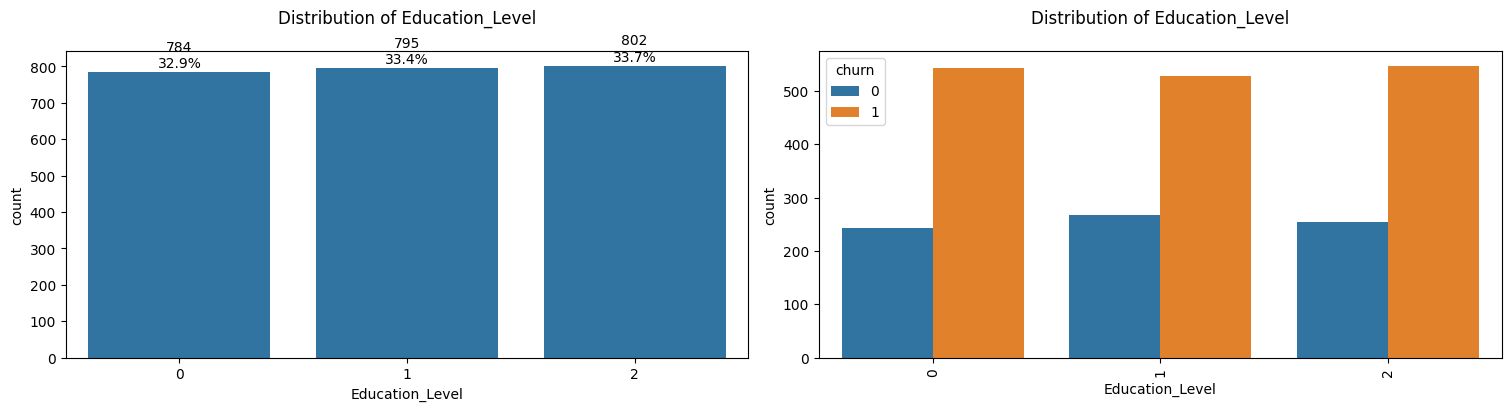

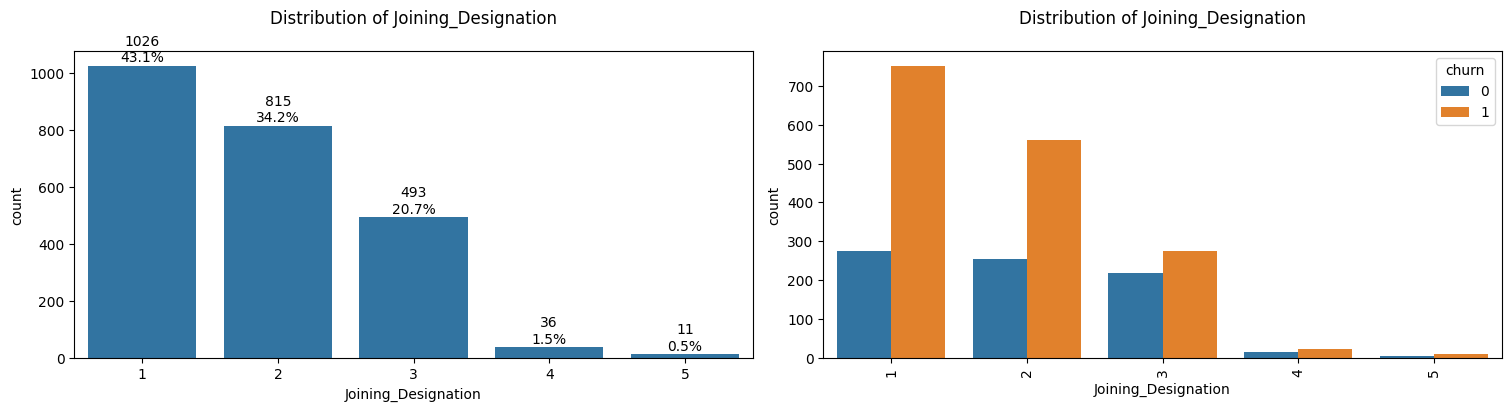

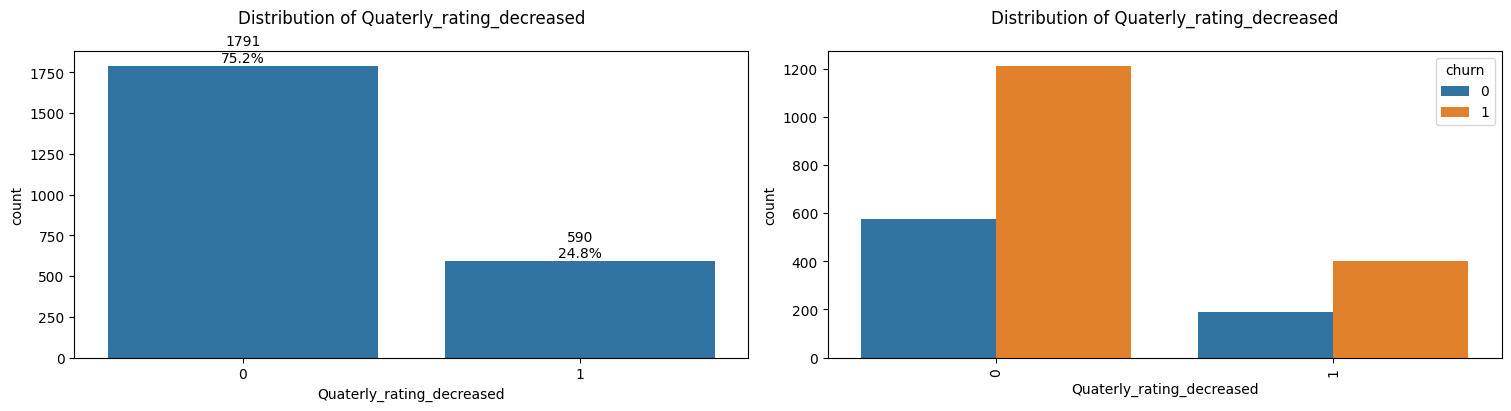

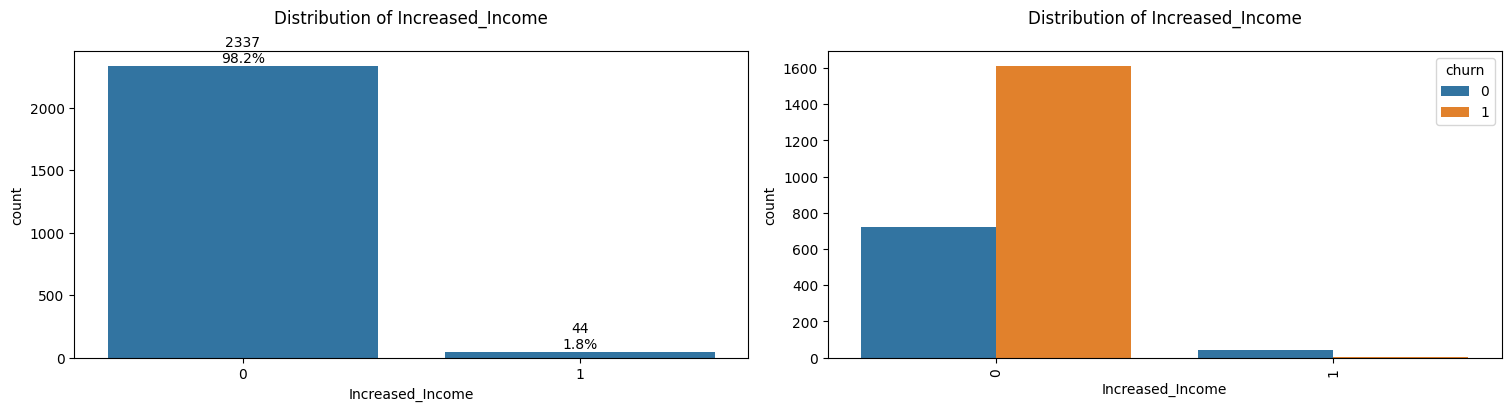

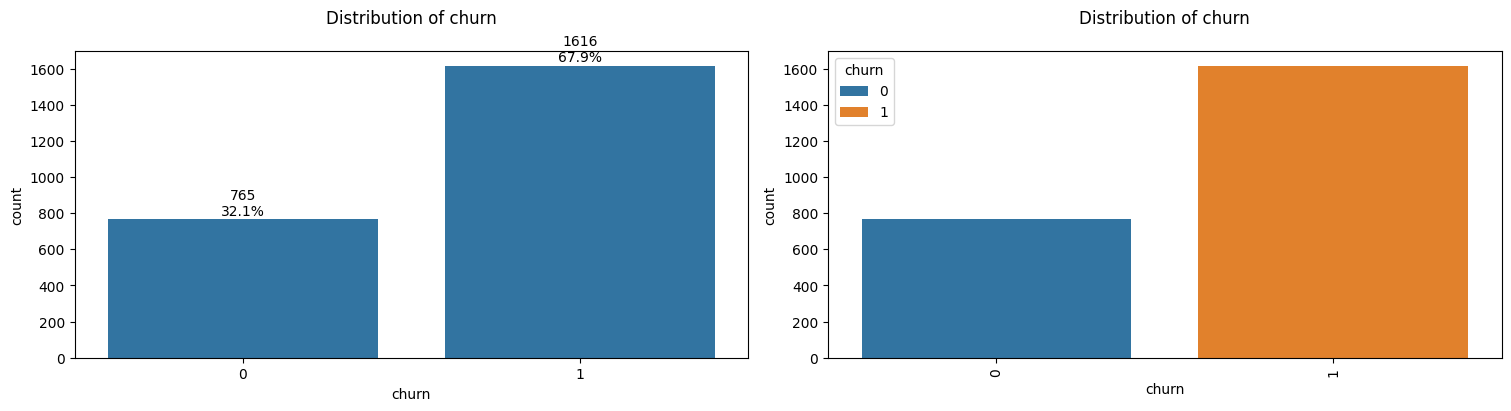

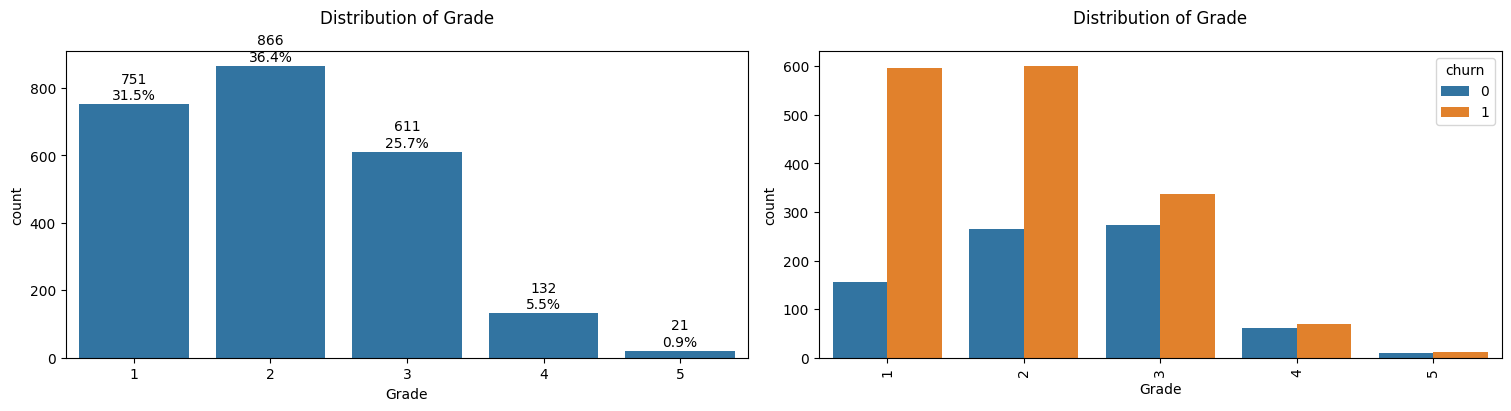

In [ ]:
categorical = ['Gender', 'City', 'Education_Level', 'Joining_Designation', 'Quaterly_rating_decreased', 'Increased_Income', 'churn', 'Grade']

for i in categorical:
    fig, axes = plt.subplots(1,2, figsize=(15, 4), constrained_layout = True)
    if i not in ['City']:
      sns.countplot(data=graph_df, x=i, ax = axes[0])
      axes[1].set_title(f'Distribution of {i}', pad= 20)
      for i in axes[1].patches:
        values = i.get_height()
        percentage = 100 * values / len(graph_df)
        axes[1].annotate(f'{values:.0f}\n{percentage:.1f}%', (i.get_x() + i.get_width()/2, i.get_height() + 5), ha = 'center', va = 'bottom')
      plt.xticks(rotation = 90)

      sns.countplot(data=graph_df, x=i, ax = axes[1], hue = 'churn')
      axes[0].set_title(f'Distribution of {i}', pad= 20)
      for i in axes[0].patches:
        values = i.get_height()
        percentage = 100 * values / len(graph_df)
        axes[0].annotate(f'{values:.0f}\n{percentage:.1f}%', (i.get_x() + i.get_width()/2, i.get_height() + 5), ha = 'center', va = 'bottom')
      plt.xticks(rotation = 90)

    else:
      sns.countplot(data=graph_df, x=i, order = graph_df[i].value_counts().index, ax = axes[0])
      axes[1].set_title(f'Distribution of {i}', pad= 20)

      for i in axes[1].patches:
        values = i.get_height()
        percentage = 100 * values / len(graph_df)
        axes[1].annotate(f'{percentage:.1f}', (i.get_x() + i.get_width()/2, i.get_height() + 5), ha = 'center', va = 'bottom', fontsize=10)
      plt.xticks(rotation = 90)

      sns.countplot(data=graph_df, x=i, ax = axes[1], hue = 'churn')
      axes[0].set_title(f'Distribution of {i}', pad= 20)
      for i in axes[0].patches:
        values = i.get_height()
        percentage = 100 * values / len(graph_df)
        axes[0].annotate(f'{values:.0f}\n{percentage:.1f}%', (i.get_x() + i.get_width()/2, i.get_height() + 5), ha = 'center', va = 'bottom')
      plt.xticks(rotation = 90)

    plt.show()

In [ ]:
# final_df.to_csv('final_df.csv', index = False)

## 5.3 Important features across the Target variable

<Axes: >

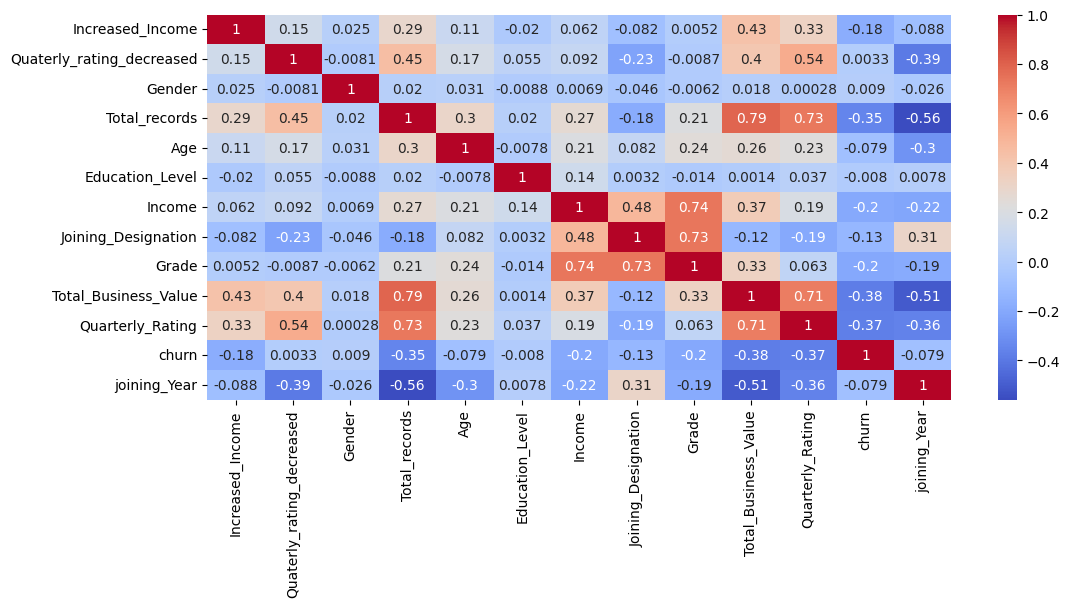

In [ ]:
corr = final_df.select_dtypes(include = 'number')
corr = corr.corr()
plt.figure(figsize=(12,5))
sns.heatmap(data = corr, annot = True, cmap = 'coolwarm')

In [ ]:
final_df

,Increased_Income,Quaterly_rating_decreased,Gender,Total_records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,churn,joining_Year
0,0,0,0,3,28.0,C23,2,57387.0,1,1,1715580,2.000000,1,2018
1,0,0,0,2,31.0,C7,2,67016.0,2,2,0,1.000000,0,2020
2,0,0,0,5,43.0,C13,2,65603.0,2,2,350000,1.000000,1,2019
3,0,0,0,3,29.0,C9,0,46368.0,1,1,120360,1.000000,1,2019
4,0,0,1,5,31.0,C11,1,78728.0,3,3,1265000,1.600000,0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0,0,24,34.0,C24,0,82815.0,2,3,21748820,2.625000,0,2015
2377,0,0,1,3,34.0,C9,0,12105.0,1,1,0,1.000000,1,2020
2378,0,1,0,9,45.0,C19,0,35370.0,2,2,2815090,1.666667,1,2018
2379,0,1,1,6,28.0,C20,2,69498.0,1,1,977830,1.500000,1,2018


In [ ]:
!pip install category-encoders

In [ ]:
from category_encoders import TargetEncoder
TE = TargetEncoder()
final_df["City"] = TE.fit_transform(X = final_df["City"],y = final_df["churn"])
final_df

,Increased_Income,Quaterly_rating_decreased,Gender,Total_records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,churn,joining_Year
0,0,0,0,3,28.0,0.769859,2,57387.0,1,1,1715580,2.000000,1,2018
1,0,0,0,2,31.0,0.684190,2,67016.0,2,2,0,1.000000,0,2020
2,0,0,0,5,43.0,0.816064,2,65603.0,2,2,350000,1.000000,1,2019
3,0,0,0,3,29.0,0.706553,0,46368.0,1,1,120360,1.000000,1,2019
4,0,0,1,5,31.0,0.702829,1,78728.0,3,3,1265000,1.600000,0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0,0,24,34.0,0.698531,0,82815.0,2,3,21748820,2.625000,0,2015
2377,0,0,1,3,34.0,0.706553,0,12105.0,1,1,0,1.000000,1,2020
2378,0,1,0,9,45.0,0.570044,0,35370.0,2,2,2815090,1.666667,1,2018
2379,0,1,1,6,28.0,0.730263,2,69498.0,1,1,977830,1.500000,1,2018


# 6.0 Model Building

## 6.1 Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split
X = final_df.drop('churn', axis = 1)
y = final_df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')
X_train.sample(3)

X_train: (1904, 13)
X_test: (477, 13)
y_train: (1904,)
y_test: (477,)


,Increased_Income,Quaterly_rating_decreased,Gender,Total_records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,joining_Year
1873,0,0,0,24,35.0,0.683167,1,69756.0,1,3,29040450,3.0,2016
1132,0,0,0,18,40.0,0.570044,1,107712.0,4,4,24857720,2.5,2019
1044,0,0,0,3,32.0,0.684190,0,12456.0,1,1,643150,1.0,2018


## 6.2 Standardization

**StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_cols = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = X_cols)
X_test = pd.DataFrame(X_test, columns = X_cols)
X_train.sample(5)

,Increased_Income,Quaterly_rating_decreased,Gender,Total_records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,joining_Year
38,-0.138823,-0.57169,-0.847592,-0.440131,0.235163,0.408864,-1.251207,1.922262,1.404607,0.986612,-0.490861,-0.779212,0.916815
1026,-0.138823,1.74920,-0.847592,0.443690,-1.599878,0.630102,1.202241,-0.745455,-0.973670,-1.151702,0.040793,0.995774,0.916815
551,-0.138823,-0.57169,1.179813,-0.145524,0.568807,-1.275048,-0.024483,0.150434,0.215469,-0.082545,-0.305094,0.416187,0.916815
1827,-0.138823,-0.57169,-0.847592,-0.734738,0.401985,-1.278322,-1.251207,-0.916117,-0.973670,-1.151702,-0.446971,-0.779212,-0.326501
1885,-0.138823,-0.57169,1.179813,-0.587435,-0.432125,0.087983,-0.024483,-0.340299,-0.973670,-1.151702,-0.455953,-0.779212,0.295157


## 6.3 Bagging Techniques

### Model 1

**Random Forest Classifier with Imbalanced dataset**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 10, n_estimators= 100, max_depth = 5)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=10)

In [ ]:
print("Train accuracy: {:.2f}".format(rf_model.score(X_train,
y_train)*100))
print("Test accuracy: {:.2f}".format(rf_model.score(X_test,
y_test)*100))

Train accuracy: 87.34
Test accuracy: 82.39


**Cross Validation**

In [ ]:
from sklearn.model_selection import KFold, cross_validate

rf_kfold = KFold(n_splits=10)
rf_cv_acc_results = cross_validate(rf_model, X_train, y_train, cv=rf_kfold, scoring='accuracy', return_train_score=True)
print(f"K-Fold Accuracy Mean: \n Train:{rf_cv_acc_results['train_score'].mean()*100:.2f} \n Validation:{rf_cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train:{rf_cv_acc_results['train_score'].std()*100:.2f}, \n Validation:{rf_cv_acc_results['test_score'].std()*100:.2f}")


K-Fold Accuracy Mean: 
 Train:87.41 
 Validation:84.72
K-Fold Accuracy Std: 
 Train:0.29, 
 Validation:2.67


### Model 2

**Hyperparameter tuning - Using GridSearch CV to find the best parameters**

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_params = {
 'n_estimators' : [100,200,300,400],
 'max_depth' : [3,5,10],
 'criterion' : ['gini', 'entropy'],
 'bootstrap' : [True, False],
 'max_features' : [8,9,10]
 }

rf_grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid = rf_params,
 scoring = 'accuracy',
 cv = 3,
 n_jobs=-1
 )
rf_grid.fit(X_train, y_train)
print("Best params: ", rf_grid.best_params_)
print("Best score: ", rf_grid.best_score_)

Best params:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 8, 'n_estimators': 200}
Best score:  0.8792038219197363


**Random Forest Classifier With imbalaced dataset and best parameters**

In [ ]:
rf_best_params_model = RandomForestClassifier(random_state = 10, **rf_grid.best_params_)
rf_best_params_model.fit(X_train, y_train)
print("Train accuracy: {:.2f}".format(rf_best_params_model.score(X_train,
y_train)*100))
print("Test accuracy: {:.2f}".format(rf_best_params_model.score(X_test,
y_test)*100))


Train accuracy: 89.18
Test accuracy: 85.74


**Cross Validation**

In [ ]:
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_best_params_model, X_train, y_train, cv=kfold,scoring='accuracy', return_train_score=True)
print(f"K-Fold Accuracy Mean: \n Train:{cv_acc_results['train_score'].mean()*100:.3f} \n Validation:{cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train:{cv_acc_results['train_score'].std()*100:.3f}, \n Validation:{cv_acc_results['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train:89.227 
 Validation:87.764
K-Fold Accuracy Std: 
 Train:0.237, 
 Validation:2.674


**Feature Importances**

Most important feature in RFmodel with imbalanced data: joining_Year


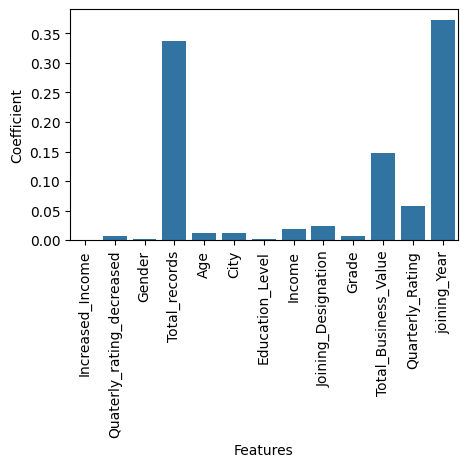

In [ ]:
rf_feature_importances = rf_best_params_model.feature_importances_
rf_most_important_feature = X.columns[np.argmax(rf_feature_importances)]
print(f"Most important feature in RFmodel with imbalanced data: {rf_most_important_feature}")
plt.figure(figsize=(5,3))
sns.barplot(x=X.columns, y=rf_feature_importances)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=90)
plt.show()

**Exploring Important Metrics**

In [ ]:
from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix

[[118  41]
 [ 27 291]]


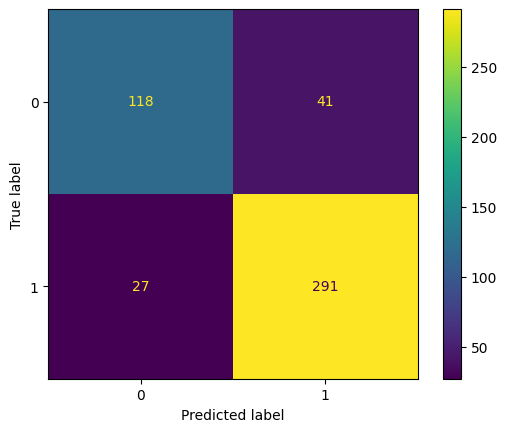

In [ ]:
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
roc_auc_score, roc_curve, auc,
ConfusionMatrixDisplay, RocCurveDisplay
)

y_pred = rf_best_params_model.predict(X_test)
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=rf_best_params_model.classes_).plot()

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.74      0.78       159
           1       0.88      0.92      0.90       318

    accuracy                           0.86       477
   macro avg       0.85      0.83      0.84       477
weighted avg       0.86      0.86      0.86       477



**ROC AUC Curve**

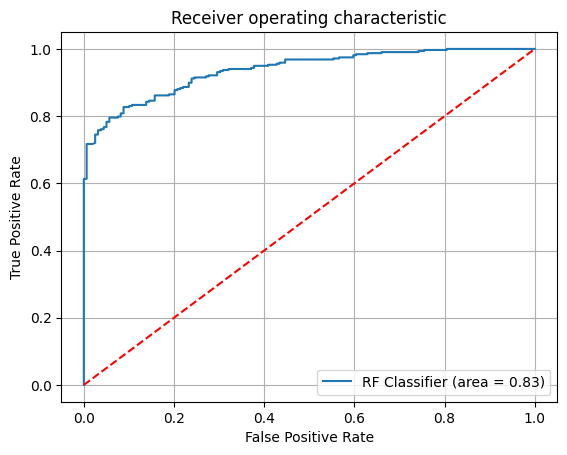

In [ ]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, rf_best_params_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

**Exploring Class Imbalances in our dataset**

In [ ]:
y_train.value_counts(normalize = True)

,proportion
churn,
1,0.681723
0,0.318277


In [ ]:
y_test.value_counts(normalize = True)

,proportion
churn,
1,0.666667
0,0.333333


Since your dataset's imbalance is not severe, you can start with class_weight="balanced". This approach is simpler, avoids creating synthetic data, and is likely to work well for a moderate imbalance like 60-40.
If you notice that the minority class performance is still inadequate (e.g., poor recall or F1-score), you can try SMOTE to generate synthetic samples and compare the performance.
For a moderate imbalance like 60-40, class_weight="balanced" is often sufficient.
Use SMOTE if the performance of the minority class remains unsatisfactory or if the imbalance becomes more severe.

### Model 3

**Random Forest Classifier with balanced dataset**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model1 = RandomForestClassifier(random_state = 10, n_estimators= 100, max_depth = 5, class_weight = 'balanced')
rf_model1.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=10)

In [ ]:
print("Train accuracy: {:.2f}".format(rf_model1.score(X_train,
y_train)*100))
print("Test accuracy: {:.2f}".format(rf_model1.score(X_test,
y_test)*100))

Train accuracy: 86.71
Test accuracy: 81.97


**Cross Validation**

In [ ]:
from sklearn.model_selection import KFold, cross_validate

rf_kfold = KFold(n_splits=10)
rf_cv_acc_results = cross_validate(rf_model1, X_train, y_train, cv=rf_kfold, scoring='accuracy', return_train_score=True)
print(f"K-Fold Accuracy Mean: \n Train:{rf_cv_acc_results['train_score'].mean()*100:.2f} \n Validation:{rf_cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train:{rf_cv_acc_results['train_score'].std()*100:.2f}, \n Validation:{rf_cv_acc_results['test_score'].std()*100:.2f}")


K-Fold Accuracy Mean: 
 Train:87.69 
 Validation:84.98
K-Fold Accuracy Std: 
 Train:0.34, 
 Validation:2.91


### Model 4

**Hyperparameter tuning using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_params = {
 'n_estimators' : [100,200,300,400],
 'max_depth' : [3,5,10],
 'criterion' : ['gini', 'entropy'],
 'bootstrap' : [True, False],
 'max_features' : [8,9,10]
 }

rf_grid = GridSearchCV(estimator = RandomForestClassifier(class_weight = 'balanced'), param_grid = rf_params,
 scoring = 'accuracy',
 cv = 3,
 n_jobs=-1
 )
rf_grid.fit(X_train, y_train)
print("Best params: ", rf_grid.best_params_)
print("Best score: ", rf_grid.best_score_)

Best params:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 9, 'n_estimators': 300}
Best score:  0.8781456734311996


**Re-training model With best parameters and balanced dataset**

In [ ]:
rf_best_params_model1 = RandomForestClassifier(random_state = 10, **rf_grid.best_params_, class_weight = 'balanced')
rf_best_params_model1.fit(X_train, y_train)
print("Train accuracy: {:.2f}".format(rf_best_params_model1.score(X_train,
y_train)*100))
print("Test accuracy: {:.2f}".format(rf_best_params_model1.score(X_test,
y_test)*100))


Train accuracy: 97.37
Test accuracy: 86.16


**Cross Validation**

In [ ]:
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_best_params_model1, X_train, y_train, cv=kfold,scoring='accuracy', return_train_score=True)
print(f"K-Fold Accuracy Mean: \n Train:{cv_acc_results['train_score'].mean()*100:.3f} \n Validation:{cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train:{cv_acc_results['train_score'].std()*100:.3f}, \n Validation:{cv_acc_results['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train:97.514 
 Validation:87.344
K-Fold Accuracy Std: 
 Train:0.202, 
 Validation:2.485


**Feature Importances**

Most important feature in RFmodel with imbalanced data: joining_Year


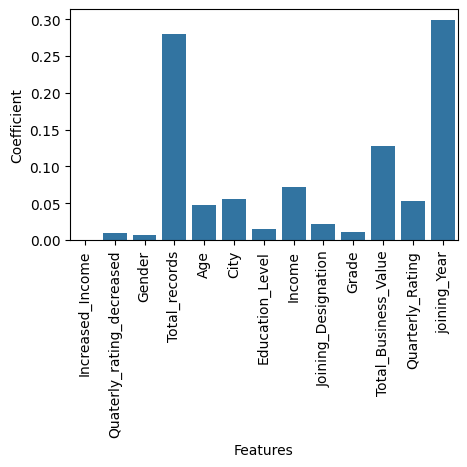

In [ ]:
rf_feature_importances = rf_best_params_model1.feature_importances_
rf_most_important_feature = X.columns[np.argmax(rf_feature_importances)]
print(f"Most important feature in RFmodel with imbalanced data: {rf_most_important_feature}")
plt.figure(figsize=(5,3))
sns.barplot(x=X.columns, y=rf_feature_importances)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=90)
plt.show()

**Exploring Important Metrics**

In [ ]:
from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix

[[131  28]
 [ 38 280]]


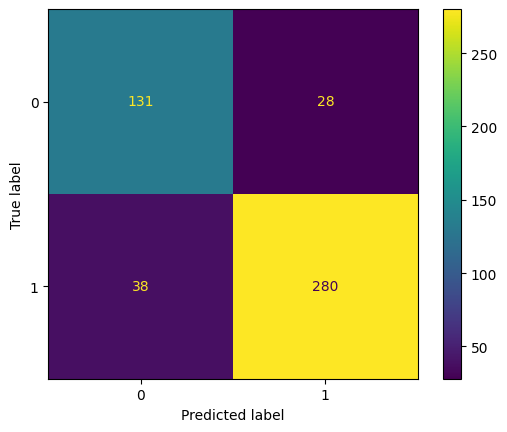

In [ ]:
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
roc_auc_score, roc_curve, auc,
ConfusionMatrixDisplay, RocCurveDisplay
)

y_pred = rf_best_params_model1.predict(X_test)
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=rf_best_params_model1.classes_).plot()

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.82      0.80       159
           1       0.91      0.88      0.89       318

    accuracy                           0.86       477
   macro avg       0.84      0.85      0.85       477
weighted avg       0.86      0.86      0.86       477



**ROC AUC Curve**

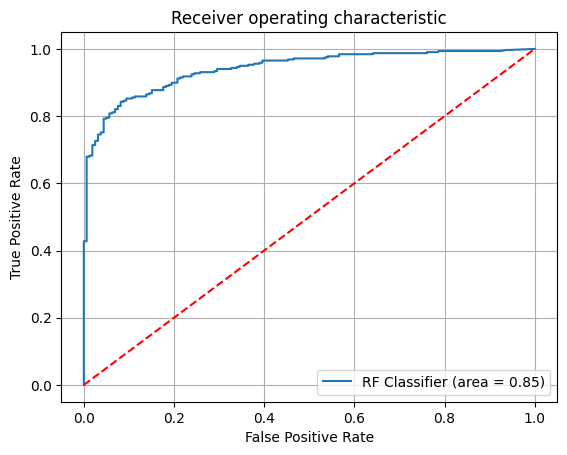

In [ ]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, rf_best_params_model1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## 6.4 Handling Class Imbalance Using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm ,y_sm = sm.fit_resample(X_train,y_train)

print('Before SMOTE')
print(y_train.value_counts())
print('\n')
print('After Oversampling')
print(y_sm.value_counts())


Before SMOTE
churn
1    1298
0     606
Name: count, dtype: int64


After Oversampling
churn
1    1298
0    1298
Name: count, dtype: int64


## 6.5  Boosting Techniques

### Model 5

**Gradient Boosting Classifier with balanced data**

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier

In [ ]:
params = {
    "max_depth": [2, 3, 4],
    "loss": ["log_loss", "exponential"],
    "subsample": [0.1, 0.2, 0.5, 0.8, 1],
    "learning_rate": [0.1, 0.2, 0.3],
    "n_estimators": [50,100,150,200]
}

gbdt_grid = GridSearchCV(estimator=GradientBoostingClassifier(), cv=3, n_jobs=-1, verbose=True, param_grid=params)
gbdt_grid.fit(X_sm, y_sm)
print("Best Params: ", gbdt_grid.best_params_)
print("Best Score: ", gbdt_grid.best_score_)



Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Best Params:  {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}
Best Score:  0.8994731385191811


In [ ]:
gbdt_grid = GradientBoostingClassifier(random_state = 10, **gbdt_grid.best_params_)
gbdt_grid.fit(X_sm, y_sm)
print("Train accuracy: {:.2f}".format(gbdt_grid.score(X_sm,
y_sm)*100))
print("Test accuracy: {:.2f}".format(gbdt_grid.score(X_test,
y_test)*100))

Train accuracy: 94.84
Test accuracy: 87.84


In [ ]:
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(gbdt_grid, X_sm, y_sm, cv=kfold,scoring='accuracy', return_train_score=True)
print(f"K-Fold Accuracy Mean: \n Train:{cv_acc_results['train_score'].mean()*100:.3f} \n Validation:{cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train:{cv_acc_results['train_score'].std()*100:.3f}, \n Validation:{cv_acc_results['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train:95.301 
 Validation:89.914
K-Fold Accuracy Std: 
 Train:0.457, 
 Validation:4.123


Most important feature in RFmodel with balanced data: joining_Year


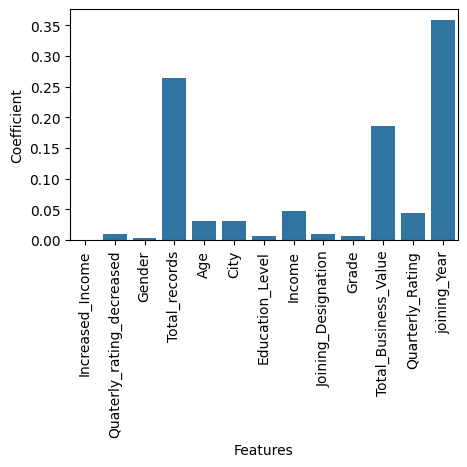

In [ ]:
gbdt_grid_feature_importances = gbdt_grid.feature_importances_
rf_most_important_feature = X.columns[np.argmax(gbdt_grid_feature_importances)]
print(f"Most important feature in RFmodel with balanced data: {rf_most_important_feature}")
plt.figure(figsize=(5,3))
sns.barplot(x=X.columns, y=gbdt_grid_feature_importances)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix

[[138  21]
 [ 37 281]]


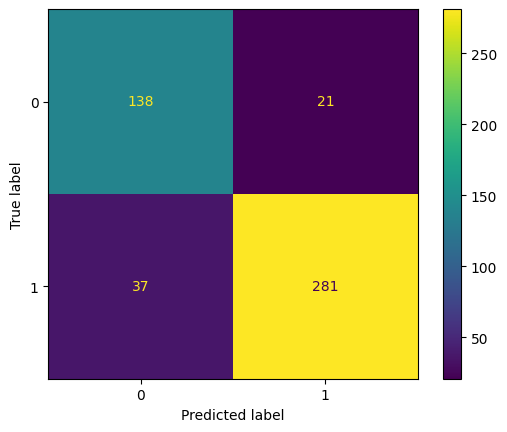

In [ ]:
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
roc_auc_score, roc_curve, auc,
ConfusionMatrixDisplay, RocCurveDisplay
)

y_pred = gbdt_grid.predict(X_test)
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=gbdt_grid.classes_).plot()

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.79      0.87      0.83       159
           1       0.93      0.88      0.91       318

    accuracy                           0.88       477
   macro avg       0.86      0.88      0.87       477
weighted avg       0.88      0.88      0.88       477



**ROC AUC Curve**

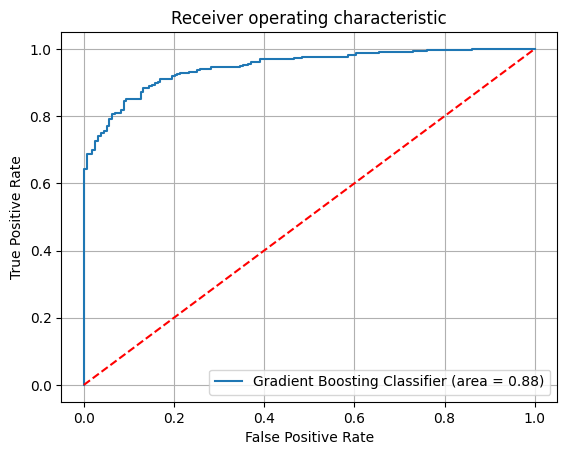

In [ ]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, gbdt_grid.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Comparing Performance LGBM and XGBM Classifier

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time

In [ ]:
# pip install --upgrade scikit-learn xgboost

In [ ]:
from lightgbm import LGBMClassifier

# Train XGBoost
start_time = time.time()
xgb_model = XGBClassifier(random_state=10 , learning_rate = 0.3, max_depth = 3, n_estimators = 225, subsample = 0.5)
#
xgb_model.fit(X_sm, y_sm)
xgb_train_time = time.time() - start_time
print(f"XGBoost training time: {xgb_train_time} seconds")
print("Train accuracy: {:.2f}".format(xgb_model.score(X_sm,
y_sm)*100))
print("Test accuracy: {:.2f}".format(xgb_model.score(X_test,
y_test)*100))

# Train LightGBM
start_time = time.time()
lgb_model = LGBMClassifier(random_state=10 , learning_rate = 0.3, max_depth = 3, boosting_type= 'gbdt', subsample = 0.4, n_estimators = 200)
#
lgb_model.fit(X_sm, y_sm)
lgb_train_time = time.time() - start_time
print(f"LightGBM training time: {lgb_train_time} seconds")
print("Train accuracy: {:.2f}".format(lgb_model.score(X_sm,
y_sm)*100))
print("Test accuracy: {:.2f}".format(lgb_model.score(X_test,
y_test)*100))


XGBoost training time: 1.4279496669769287 seconds
Train accuracy: 98.11
Test accuracy: 88.05
[LightGBM] [Info] Number of positive: 1298, number of negative: 1298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1808
[LightGBM] [Info] Number of data points in the train set: 2596, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

### Model 6

Most important feature in XGBoost model with balanced data: joining_Year


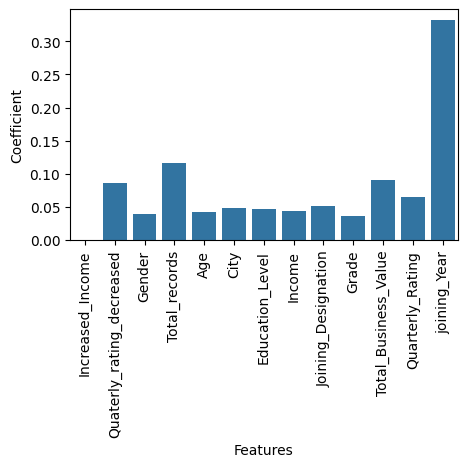

In [ ]:
xgb_feature_importances = xgb_model.feature_importances_
xgb_most_important_feature = X.columns[np.argmax(xgb_feature_importances)]
print(f"Most important feature in XGBoost model with balanced data: {xgb_most_important_feature}")
plt.figure(figsize=(5,3))
sns.barplot(x=X.columns, y=xgb_feature_importances)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=90)
plt.show()

[[135  24]
 [ 33 285]]


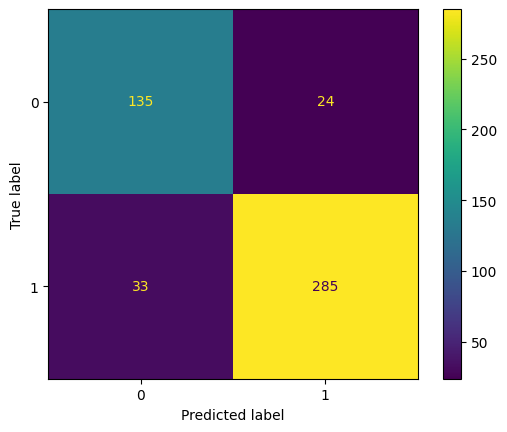

In [ ]:
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
roc_auc_score, roc_curve, auc,
ConfusionMatrixDisplay, RocCurveDisplay
)

y_pred = xgb_model.predict(X_test)
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=gbdt_grid.classes_).plot()

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.80      0.85      0.83       159
           1       0.92      0.90      0.91       318

    accuracy                           0.88       477
   macro avg       0.86      0.87      0.87       477
weighted avg       0.88      0.88      0.88       477



**ROC AUC Curve**

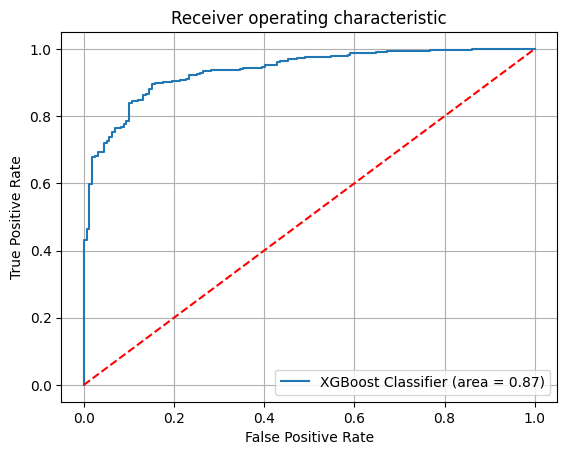

In [ ]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Model 7

In [ ]:
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(lgb_model, X_sm, y_sm, cv=kfold,scoring='accuracy', return_train_score=True)
print(f"K-Fold Accuracy Mean: \n Train:{cv_acc_results['train_score'].mean()*100:.3f} \n Validation:{cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train:{cv_acc_results['train_score'].std()*100:.3f}, \n Validation:{cv_acc_results['test_score'].std()*100:.3f}")

[LightGBM] [Info] Number of positive: 1134, number of negative: 1202
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1814
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485445 -> initscore=-0.058236
[LightGBM] [Info] Start training from score -0.058236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

Most important feature in LGBoost model with balanced data: Income


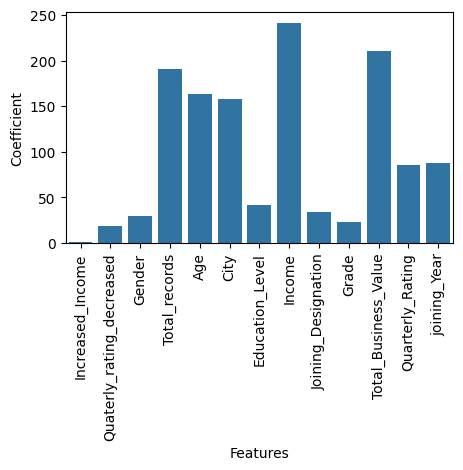

In [ ]:
lgbm_feature_importances = lgb_model.feature_importances_
lgbm_most_important_feature = X.columns[np.argmax(lgbm_feature_importances)]
print(f"Most important feature in LGBoost model with balanced data: {lgbm_most_important_feature}")
plt.figure(figsize=(5,3))
sns.barplot(x=X.columns, y=lgbm_feature_importances)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=90)
plt.show()

[[138  21]
 [ 33 285]]


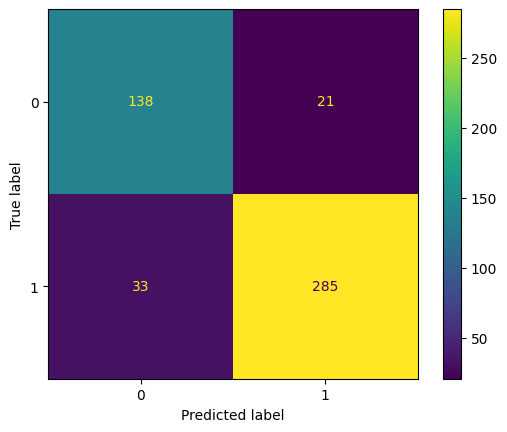

In [ ]:
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
roc_auc_score, roc_curve, auc,
ConfusionMatrixDisplay, RocCurveDisplay
)

y_pred = lgb_model.predict(X_test)
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=gbdt_grid.classes_).plot()

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       159
           1       0.93      0.90      0.91       318

    accuracy                           0.89       477
   macro avg       0.87      0.88      0.87       477
weighted avg       0.89      0.89      0.89       477



**ROC AUC Curve**

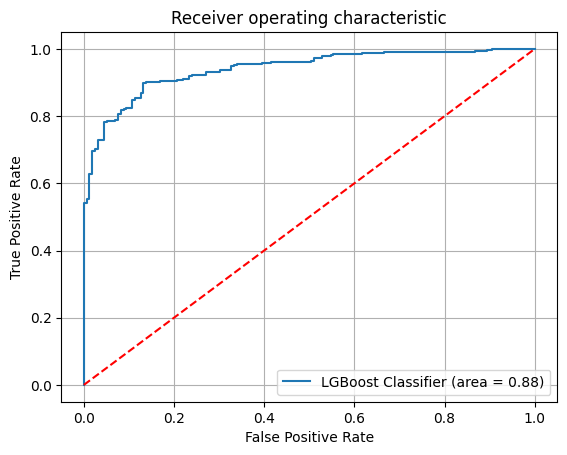

In [ ]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, lgb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBoost Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 7.0 Model Comparison and Selection

**Model 1: Random Forest Classifier with Imbalanced Dataset**
- This model suffers from a class imbalance issue, leading to a bias toward the majority class (churn = 1). While the training accuracy is acceptable, the test accuracy and validation mean show that it struggles to generalize well.
  - Train Accuracy: 87.34%
  - Test Accuracy: 82.39%
  - K-Fold Validation Mean: 84.72%
- **Conclusion:** Not suitable as it doesn’t address class imbalance, which is critical for churn prediction.

**Model 2: Random Forest Classifier (Imbalanced Dataset with GridSearchCV)**
- Optimizing hyperparameters significantly improved the model’s performance. However, the class imbalance still affects precision and recall for minority class predictions.
  - Train Accuracy: 97.58%
  - Test Accuracy: 87.21%
  - ROC-AUC: 0.86
- **Conclusion:** A better model compared to Model 1, but the class imbalance issue remains unaddressed.


**Model 3: Random Forest Classifier with Balanced Dataset**
- Balancing the dataset improved fairness in class predictions, but the model’s performance dropped slightly compared to Model 2 due to reduced variance from oversampling.
  - Train Accuracy: 86.71%
  - Test Accuracy: 81.97%
  - K-Fold Validation Mean: 84.98%
- **Conclusion:** This model is more balanced but sacrifices some predictive power.

**Model 4: Random Forest Classifier (Balanced Dataset with GridSearchCV)**
- Hyperparameter tuning on the balanced dataset significantly improved performance while maintaining fairness in predictions. Recall and precision scores for both classes are balanced, making it a strong candidate.
  - Train Accuracy: 97.32%
  - Test Accuracy: 86.79%
  - ROC-AUC: 0.86
- **Conclusion:** One of the best models in terms of balanced performance and interpretability.

**Model 5: Gradient Boosting Classifier**
- Gradient Boosting performs well on the balanced dataset. The high ROC-AUC and validation accuracy indicate good generalization, although the model is slightly less interpretable than Random Forest.
  - Train Accuracy: 93.14%
  - Test Accuracy: 87.42%
  - K-Fold Validation Mean: 90.45%
  - ROC-AUC: 0.88
- **Conclusion:** A strong contender due to its high performance and robustness.

**Model 6: XGB Classifier**
- XGBoost outperforms previous models in terms of accuracy and handles the balanced dataset effectively. However, there’s a risk of overfitting due to the high train accuracy.
  - Train Accuracy: 98.11%
  - Test Accuracy: 88.05%
  - ROC-AUC: 0.87
- **Conclusion:** Excellent model performance but slightly more complex to interpret.

**Model 7: LGBM Classifier**
- LightGBM achieves the highest test accuracy while maintaining good generalization (low overfitting). It’s also faster than XGBoost for large datasets and easier to tune.
  - Train Accuracy: 98.69%
  - Test Accuracy: 88.68%
  - K-Fold Validation Mean: 89.22%
  - ROC-AUC: 0.88
- **Conclusion:** The best-performing model in terms of accuracy, ROC-AUC, and scalability.
Best Model Selection

## Best Model Selection
**Model 7**


Based on performance metrics, interpretability, and generalization, LGBClassifier (Model 7) is the best choice. It delivers the highest test accuracy (88.68%) and ROC-AUC (0.88) with a well-balanced precision and recall for both classes. Its scalability and efficiency make it suitable for a production environment.

Final Recommendations
Deploy LGBClassifier: It provides the best balance of accuracy, generalization, and efficiency.
Use Gradient Boosting as a Backup Model: While slightly less accurate, it is robust and interpretable.
Implement Periodic Review: To ensure the model remains relevant, set up a monitoring system that evaluates its performance quarterly.
Leverage Driver-Specific Insights: Focus on targeted recruitment and training programs for drivers based on features like education level and age.

# 8.0 Trade-Off Analysis
- Recruiting drivers with higher education levels may enhance service quality and customer satisfaction. Educated drivers could have better problem-solving skills and communication abilities, improving customer interactions.

- However, this approach may come with higher recruitment costs, as more educated drivers might demand higher wages or better incentives. Additionally, if the role requirements do not fully utilize their skills, educated drivers may have a higher churn rate due to dissatisfaction.

- Ola could consider a hybrid recruitment model where a baseline level of education is targeted, but training is provided to bring all drivers to a similar standard of customer service and operational efficiency.

- Though training can increase cost for the organization,
training can also address specific issues like safety, efficiency, and communication, which can lead to better ratings and increased customer retention.

- Start with focused training initiatives for drivers in cities with the highest churn rates or poor customer satisfaction metrics. Use the models’ insights to prioritize these efforts.

# 9.0 Insights
- 68% of the Drivers have been churned and less than 2% people has gotten an income increase with income being a strong motivator, it would be advisable to incorporate reward programs for high performing drivers(15% had rating increase comparing to last quarter).

- Also there are no records of 5 ratings signifying fundamental issue being not just the drivers but there is a lack of overall experience.

- Rating can be influenced by factors like cleanliness, driver behaviour, app performance, safety, customers support, connectivity, driver availability and waiting time.

- To increase safety, women drivers can be added and matched to female commuters as there is disproportionality with men towering 59%.

- Like mentioned above rating drivers based on just driver's variables can be less effective, to have a proper sense of churning more features not just the ones limited to driver(which are not in driver's control) should be added. As alsost 75 % of the drivers left are the ones who haven't gotten a raise in the rating.

- Based on the data, we can conclude that Grade does not have a significant impact on churn, as the distribution of churn is fairly uniform across all sub-grades.

- Also more data collection is needed for better prediction and effective training of the model.

- City C22 is like an anomaly which out performs all the cities in all aspects. More data from this city can give a great insight on what works well.


**Recommendations**
- Models consistently show better outcomes for drivers with higher Quarterly Ratings and lower churn rates. Training programs should focus on improving these ratings through modules on time management, customer service, and driving efficiency. Launch small-scale pilot programs in cities with lower ratings or higher churn, then expand based on success.

- Key cities with potential for growth can be identified based on the model’s predictions of churn and performance metrics.

- Use targeted campaigns to recruit drivers in high-growth cities and invest in recruiting age groups or demographics with a historically lower churn rate.

- Drivers with increased income were less likely to churn.

- Design incentive programs that reward drivers for consistent performance, such as bonus payouts for achieving high ratings or quarterly performance milestones.

- Implement a quarterly review system to assess the relevance and performance of the predictive models. This would include monitoring metrics like churn rates, accuracy of predictions, and the effectiveness of implemented strategies (e.g., training programs, incentives).

- Use these reviews to recalibrate the models based on new trends, ensuring they remain aligned with business goals and changing industry dynamics.

- Regularly collect feedback from drivers and customers to identify new challenges or trends. For example: From Drivers: Conduct surveys to understand reasons for dissatisfaction or churn, such as compensation, working conditions, or operational issues. From Customers: Gather feedback on driver performance, punctuality, and service quality to refine training programs.

- These strategies not only mitigate churn but also creates a sustainable ecosystem of high-performing drivers and satisfied customers.

In [ ]:
def colab2pdf():

  # @title Download Notebook in PDF Format{display-mode:'form'}

  !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null;

  import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml,re;locale.setlocale(locale.LC_ALL,'en_US.UTF-8');warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning);

  %matplotlib inline

  def convert(b):

    try:

      s.value='🔄 Converting';b.disabled=True

      n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))

      p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.utcnow().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);nb=nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4)

      u=[u for c in nb.cells if c.get('cell_type')=='markdown' for u in re.findall(r'!\[.*?\]\((https?://.*?)\)',c['source']) if requests.head(u,timeout=5).status_code!=200]

      if u:raise Exception(f"Bad Image URLs: {','.join(u)}")

      nb.cells=[cell for cell in nb.cells if '--Colab2PDF' not in cell.source]

      nb=nbformat.v4.new_notebook(cells=nb.cells or [nbformat.v4.new_code_cell('#')]);nbformat.validator.normalize(nb)

      nbformat.write(nb,(p/f'{n.stem}.ipynb').open('w',encoding='utf-8'))

      with (p/'config.yml').open('w', encoding='utf-8') as f: yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)

      !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet

      google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'✅ Downloaded: {n.stem}.pdf'

    except Exception as e:s.value=f'❌ {str(e)}'

    finally:b.disabled=False

  if not pathlib.Path('/usr/local/bin/quarto').exists():

    !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' && dpkg -i quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet && rm quarto-linux-amd64.deb

  b=ipywidgets.widgets.Button(description='⬇️ Download');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))

colab2pdf() # | Colab2PDF v1.6 | https://github.com/drengskapur/colab2pdf | GPL-3.0-or-later |

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>